In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

**PREPROCESSING_CLEANING**

In [2]:
df=pd.read_csv('D:/Semester 6/NLP/Assignment #3/urdu-sentiment-corpus-v1.tsv', sep='\t', header=0)
df = df[df['Class'] != 'O'] #dropping O as i will do binary classification

In [3]:
print(df['Class'].value_counts())
df.loc[df['Class'] == 'N', 'Class'] = 0
df.loc[df['Class'] == 'P', 'Class'] = 1

Class
N    499
P    480
Name: count, dtype: int64


In [4]:
df['Class'].value_counts()

Class
0    499
1    480
Name: count, dtype: int64

In [5]:
print(df.isnull().sum())
df=df.dropna()
print(df.isnull().sum())
print(df.head(5))

Tweet    0
Class    1
dtype: int64
Tweet    0
Class    0
dtype: int64
                                               Tweet Class
0  میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...     1
1  چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...     0
3  سرچ انجن گوگل کے نائب صدر نے فضا میں ، 130,000...     1
4    ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ     1
5   گندی زبان اور گٹر جیسے دماغ والے جاهل جیالے ه...     0


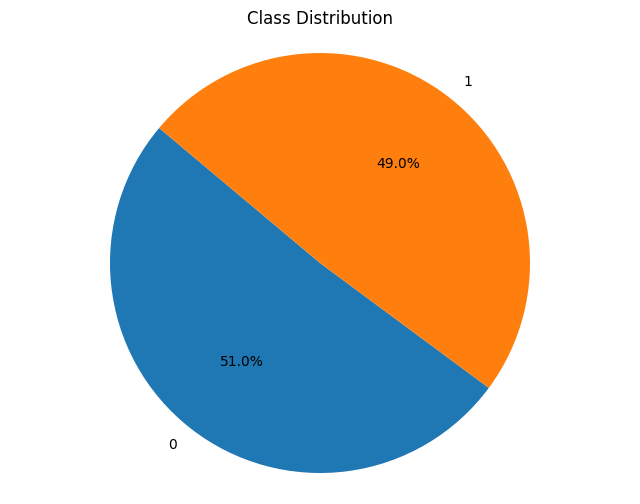

In [6]:
class_counts = df['Class'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.axis('equal')  
plt.show()


In [7]:
df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'[^آ-ی\s]', '', x)) # removing everything except alpha values

def reverse_urdu(row):
    words = row.split() #split the words 
    reversed_sentence = ' '.join(reversed(words))  # reverse and rejoin
    return reversed_sentence

df['Tweet'] = df['Tweet'].apply(reverse_urdu)
df.head(5)

,Tweet,Class
0,ایٹمی کی کہوٹہ بم بنتاایٹم نہیں میں فیکٹری اتف...,1
1,سکت بن نہیں اعظم وزیر خان عمران اور انقلاب س چند,0
3,کی چھلانگ کرلیا قائم ریکارڈ عالمی کر لگا چھلان...,1
4,أْ یار ہیں جاتی آ کبھی کبھی لہریں اسکی تک ابھی,1
5,نهیں ممکن یه هو نه جاهل اور هو جیالا تم هو جیا...,0


In [8]:
stopwordsssssss=set([
    "کوئی", "نہیں", "کہ", "کر", "جائیں", "مجھے", "یہ", "بہت", "ہے", "سچ", 
    "تو", "میری", "کی", "آواز", "آجاتی", "ایک", "سے", "پورا", "کاسہ", "ڈالا"
])

df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join(word for word in x.split() if word not in stopwordsssssss))  # Remove stop words

In [9]:
# Download NLTK resources if not already downloaded
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
#nltk.download('punkt')

# Tokenize text into sentences and then into words
data = [word_tokenize(sentence) for sentence in df['Tweet']]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arhar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
print(len(data))
print((data))


979
[['ایٹمی', 'کہوٹہ', 'بم', 'بنتاایٹم', 'میں', 'فیکٹری', 'اتفاق', 'والی', 'لکھپت', 'کوٹ', 'بمب', 'ایٹم', 'بھائی', 'او', 'ھ', 'بنایا', 'بم', 'ایٹم', 'ن', 'میں'], ['سکت', 'بن', 'اعظم', 'وزیر', 'خان', 'عمران', 'اور', 'انقلاب', 'س', 'چند'], ['چھلانگ', 'کرلیا', 'قائم', 'ریکارڈ', 'عالمی', 'لگا', 'چھلانگ', 'پر', 'بلندی', 'فٹ', 'میں', 'فضا', 'ن', 'صدر', 'نائب', 'ک', 'گوگل', 'انجن', 'سرچ'], ['أْ', 'یار', 'ہیں', 'جاتی', 'آ', 'کبھی', 'کبھی', 'لہریں', 'اسکی', 'تک', 'ابھی'], ['نهیں', 'ممکن', 'یه', 'هو', 'نه', 'جاهل', 'اور', 'هو', 'جیالا', 'تم', 'هو', 'جیال', 'جاهل', 'وال', 'دماغ', 'جیس', 'گٹر', 'اور', 'زبان', 'گندی'], ['تم', 'بھی', 'مظلوم', 'اور', 'ہم', 'بھی', 'تمظالم', 'بھی', 'مقتول', 'تم', 'بھی', 'قاتل'], [], ['ھ', 'جاتى', 'بهى', 'هو', 'اكثر', 'ليكن', 'ھ', 'لفظ', 'محبت', 'تم', 'لِكهنا', 'بهى', 'کچھ', 'سنبهل', 'ھ', 'شرارت', 'كى', 'لفظوں'], ['متعارف', 'کیپ', 'ڈیٹاکس', 'ڈجٹل', 'لی', 'ک', 'عادیوں', 'ک', 'فون', 'سمارٹ'], ['اجلاس', 'کا', 'رہنماؤں', 'پارلیمانی', 'صدارت', 'زیر', 'اعظم', 'وزیر'], ['دیا'

**TRAINING_EMBEDDINGS**

In [12]:
from gensim.models import Word2Vec


word2vec_model = Word2Vec(sentences=data, vector_size=100, window=5, min_count=1, workers=4)
#word2vec_model.save("word2vec_model.model")


In [79]:
from gensim.models import FastText

fasttext_model = FastText(sentences=data, vector_size=100, window=5, min_count=1, workers=4)
#fasttext_model.save("fasttext_urdu.model")

In [84]:
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

glove_file = 'glove.6B.50d.txt'

glove_embeddings = load_glove_embeddings(glove_file)
word_embedding = glove_embeddings.get('word')
print(word_embedding)


[-0.1643     0.15722   -0.55021   -0.3303     0.66463   -0.1152
 -0.2261    -0.23674   -0.86119    0.24319    0.074499   0.61081
  0.73683   -0.35224    0.61346    0.0050975 -0.62538   -0.0050458
  0.18392   -0.12214   -0.65973   -0.30673    0.35038    0.75805
  1.0183    -1.7424    -1.4277     0.38032    0.37713   -0.74941
  2.9401    -0.8097    -0.66901    0.23123   -0.073194  -0.13624
  0.24424   -1.0129    -0.24919   -0.06893    0.70231   -0.022177
 -0.64684    0.59599    0.027092   0.11203    0.61214    0.74339
  0.23572   -0.1369   ]


In [85]:

GloveEmbs = load_glove_embeddings(glove_file)
embeddingDim = len(next(iter(GloveEmbs.values())))
lenVocab = len(GloveEmbs)
Glove_embedding=np.zeros((lenVocab, embeddingDim), dtype=np.float32)
for word, i in tokenizer.word_index.items():
    embeddingVector=GloveEmbs.get('word')
    if embeddingVector is not None:
        Glove_embedding[i]=embeddingVector


**DATA_PREPARATION**

In [38]:
from sklearn.model_selection import train_test_split

X = df['Tweet'].values
y = df['Class'].values.astype("int32")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer

max_words=4000
tokenizer = Tokenizer(num_words=4000) #sligtly larger value than the actual number of unique words
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

num_unique_words = len(tokenizer.word_index)
print(num_unique_words)

3715


In [41]:
max_len = max([len(seq) for seq in sequences]) #will use this to determine padding maximum length
max_len

35

In [42]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [43]:
from tensorflow.keras.utils import to_categorical

num_classes=2
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)
y_test = y_test.astype(int)

**MODEL_WITHOUT_EMBEDDING**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary', zero_division=1)
    recall = recall_score(y_true, y_pred, average='binary', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='binary', zero_division=1)
    return accuracy, precision, recall, f1


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

def create_train_model_LSTM():
    model = Sequential()
    model.add(Embedding(max_words, 100, input_length=max_len)) #using 100 so it captures some more relationship our corpus is to small
    for _ in range(2):
        model.add(LSTM(64, dropout=0.7, return_sequences=True))
    model.add(LSTM(64, dropout=0.7))
    model.add(Dense(2, activation='sigmoid')) #using 2 neuron dense layer because of binary classification 
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=128, verbose=0)
    return model

In [90]:
LSTM_results = []
model = create_train_model_LSTM()
y_pred_prob = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)
y_pred = y_pred.astype(int)
            
accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)

LSTM_results.append({
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1-score': f1
            })

LSTM_results

8/8 [==============================] - 1s 11ms/step


[{'Accuracy': 0.6285714285714286,
  'Precision': 0.62,
  'Recall': 0.5391304347826087,
  'F1-score': 0.5767441860465117}]

**MODEL_WORD_EMBEDDINGS**

In [74]:
#using 2 layers and 0.7 dropout
def create_lstm_model(embedding_matrix):
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], 
                        weights=[embedding_matrix], input_length=max_len, trainable=False))
    for _ in range(2):
        model.add(LSTM(64, dropout=0.7, return_sequences=True))
    model.add(LSTM(64, dropout=0.7))
    model.add(Dense(2, activation='sigmoid')) #using 2 neuron dense layer because of binary classification 
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=128, verbose=0)
    return model

In [77]:
Word2Vec_Results = []
model = create_lstm_model(word2vec_model.wv.vectors)
y_pred_prob = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)
y_pred = y_pred.astype(int)
            
accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)

Word2Vec_Results.append({
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1-score': f1
            })

Word2Vec_Results

8/8 [==============================] - 1s 12ms/step


[{'Accuracy': 0.47346938775510206,
  'Precision': 0.4713114754098361,
  'Recall': 1.0,
  'F1-score': 0.6406685236768802}]

In [82]:
FastText_Results = []
model = create_lstm_model(fasttext_model.wv.vectors)
y_pred_prob = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)
y_pred = y_pred.astype(int)
            
accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)

FastText_Results.append({
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1-score': f1
            })

FastText_Results

8/8 [==============================] - 1s 8ms/step


[{'Accuracy': 0.46122448979591835,
  'Precision': 0.4641350210970464,
  'Recall': 0.9565217391304348,
  'F1-score': 0.625}]

In [88]:
Glove_Results = []
model = create_lstm_model(Glove_embedding)
y_pred_prob = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)
y_pred = y_pred.astype(int)
            
accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)

Glove_Results.append({
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1-score': f1
            })

Glove_Results

8/8 [==============================] - 1s 13ms/step


[{'Accuracy': 0.49795918367346936,
  'Precision': 0.45348837209302323,
  'Recall': 0.3391304347826087,
  'F1-score': 0.3880597014925373}]

In [93]:
LSTM=pd.DataFrame(LSTM_results)
LSTM_W2V=pd.DataFrame(Word2Vec_Results)
LSTM_FT=pd.DataFrame(FastText_Results)
LSTM_G=pd.DataFrame(Glove_Results)

In [94]:
LSTM['Model'] = 'LSTM'
LSTM_W2V['Model'] = 'LSTM_W2V'
LSTM_FT['Model'] = 'LSTM_FT'
LSTM_G['Model'] = 'LSTM_G'

combined_df = pd.concat([LSTM, LSTM_W2V, LSTM_FT, LSTM_G], ignore_index=True)

print(combined_df)

   Accuracy  Precision    Recall  F1-score     Model
0  0.628571   0.620000  0.539130  0.576744      LSTM
1  0.473469   0.471311  1.000000  0.640669  LSTM_W2V
2  0.461224   0.464135  0.956522  0.625000   LSTM_FT
3  0.497959   0.453488  0.339130  0.388060    LSTM_G
